# SatImage Dataset

In [1]:
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
import numpy as np

In [11]:
satimage = fetch_datasets()["satimage"]
X, y = satimage.data, satimage.target

print(np.unique(y))

[-1  1]


Counter({-1: 5809, 1: 626})


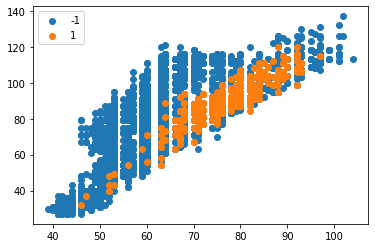

In [12]:
from matplotlib import pyplot as plt
from numpy import where
from collections import Counter

counter = Counter(y)
print(counter)

def plot_points(counter):
    # scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    plt.legend()
    plt.show()
    
plot_points(counter)

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

def logistic_regression(X,y):
    # Train a logistic regression model using the balanced class weights 

    default_log_reg = LogisticRegression(class_weight=None, max_iter=1000)
    balanced_log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)

    # Important to use a stratified K folds to make sure representative proportion of minority examples are used in each fold
    cv = StratifiedKFold(n_splits=5, shuffle=True)

    scores = cross_val_score(estimator=default_log_reg, X=X, y=y, cv=cv, scoring='accuracy')
    def_log_reg_acc = np.mean(scores)

    scores = cross_val_score(estimator=balanced_log_reg, X=X, y=y, cv=cv, scoring='accuracy')
    bal_log_reg_acc = np.mean(scores)

    scores = cross_val_score(estimator=default_log_reg, X=X, y=y, cv=cv, scoring='roc_auc')
    def_log_reg_roc = np.mean(scores)

    scores = cross_val_score(estimator=balanced_log_reg, X=X, y=y, cv=cv, scoring='roc_auc')
    bal_log_reg_roc = np.mean(scores)

    print("Default logistic regression accuracy  =", '{:.6f}, AUC = {:.6f}'.format(def_log_reg_acc, def_log_reg_roc))
    print("Balanced logistic regression accuracy =", '{:.6f}, AUC = {:.6f}'.format(bal_log_reg_acc, bal_log_reg_roc))

In [14]:
logistic_regression(X, y)

Default logistic regression accuracy  = 0.904118, AUC = 0.770607
Balanced logistic regression accuracy = 0.614763, AUC = 0.764920


Counter({-1: 626, 1: 626})


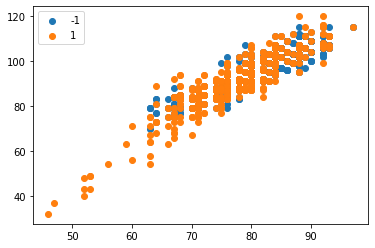

Default logistic regression accuracy  = 0.726821, AUC = 0.778683
Balanced logistic regression accuracy = 0.737218, AUC = 0.780926


In [15]:
# NearMiss-1
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=1, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 626, 1: 626})


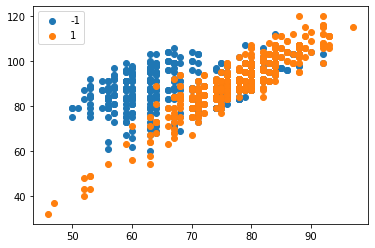

Default logistic regression accuracy  = 0.731630, AUC = 0.800926
Balanced logistic regression accuracy = 0.724456, AUC = 0.802590


In [16]:
# NearMiss-2
from imblearn.under_sampling import NearMiss

X, y = satimage.data, satimage.target
undersample = NearMiss(version=2, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 626, 1: 626})


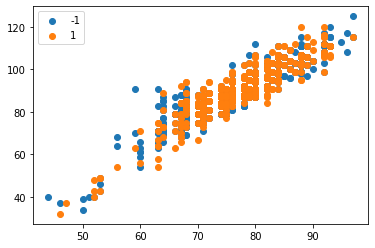

Default logistic regression accuracy  = 0.583898, AUC = 0.613360
Balanced logistic regression accuracy = 0.578304, AUC = 0.626947


In [17]:
# NearMiss-3
from imblearn.under_sampling import NearMiss

X, y = satimage.data, satimage.target
undersample = NearMiss(version=3, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 656, 1: 626})


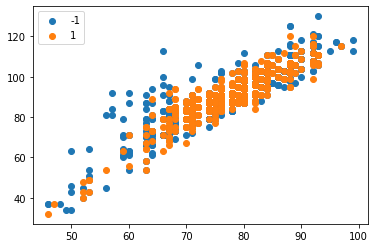

Default logistic regression accuracy  = 0.629469, AUC = 0.677753
Balanced logistic regression accuracy = 0.623210, AUC = 0.663749


In [18]:
from imblearn.under_sampling import CondensedNearestNeighbour

X, y = satimage.data, satimage.target
undersample = CondensedNearestNeighbour(n_neighbors=1)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 5770, 1: 626})


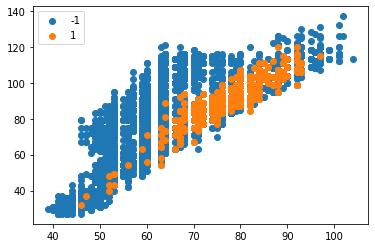

Default logistic regression accuracy  = 0.902752, AUC = 0.773024
Balanced logistic regression accuracy = 0.620546, AUC = 0.767075


In [19]:
from imblearn.under_sampling import TomekLinks

X, y = satimage.data, satimage.target
undersample = TomekLinks()
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 1608, 1: 626})


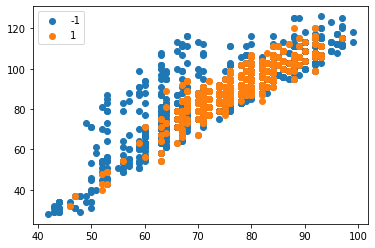

Default logistic regression accuracy  = 0.717538, AUC = 0.684142
Balanced logistic regression accuracy = 0.629819, AUC = 0.690696


In [20]:
from imblearn.under_sampling import OneSidedSelection

X, y = satimage.data, satimage.target
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

# US Crime Dataset

In [21]:
us_crime = fetch_datasets()["us_crime"]
X, y = us_crime.data, us_crime.target

Counter({-1: 1844, 1: 150})


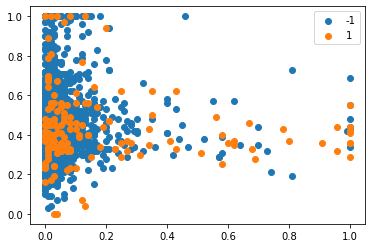

In [22]:
counter = Counter(y)
print(counter)

plot_points(counter)

In [23]:
logistic_regression(X, y)

Default logistic regression accuracy  = 0.940319, AUC = 0.925606
Balanced logistic regression accuracy = 0.866095, AUC = 0.919259


Counter({-1: 150, 1: 150})


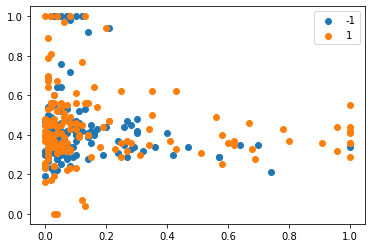

Default logistic regression accuracy  = 0.703333, AUC = 0.790444
Balanced logistic regression accuracy = 0.703333, AUC = 0.779778


In [24]:
# NearMiss-1
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=1, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 150, 1: 150})


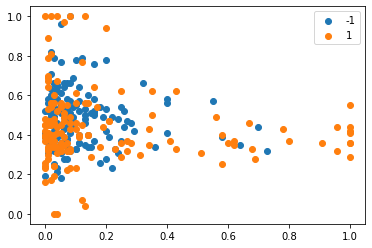

Default logistic regression accuracy  = 0.833333, AUC = 0.888222
Balanced logistic regression accuracy = 0.816667, AUC = 0.880000


In [25]:
# NearMiss-2
from imblearn.under_sampling import NearMiss

X, y = us_crime.data, us_crime.target
undersample = NearMiss(version=2, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 150, 1: 150})


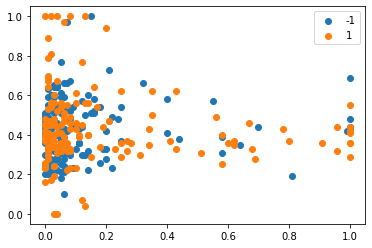

Default logistic regression accuracy  = 0.703333, AUC = 0.697111
Balanced logistic regression accuracy = 0.683333, AUC = 0.743333


In [26]:
# NearMiss-3
from imblearn.under_sampling import NearMiss

X, y = us_crime.data, us_crime.target
undersample = NearMiss(version=3, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 249, 1: 150})


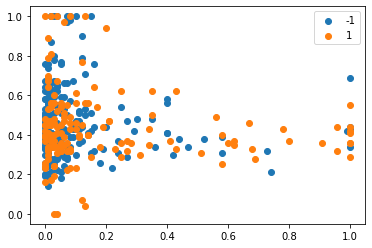

Default logistic regression accuracy  = 0.734462, AUC = 0.768005
Balanced logistic regression accuracy = 0.719525, AUC = 0.779184


In [27]:
from imblearn.under_sampling import CondensedNearestNeighbour

X, y = us_crime.data, us_crime.target
undersample = CondensedNearestNeighbour(n_neighbors=1)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 1818, 1: 150})


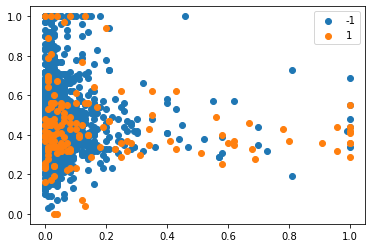

Default logistic regression accuracy  = 0.942584, AUC = 0.932893
Balanced logistic regression accuracy = 0.864842, AUC = 0.928783


In [28]:
from imblearn.under_sampling import TomekLinks

X, y = us_crime.data, us_crime.target
undersample = TomekLinks()
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 427, 1: 150})


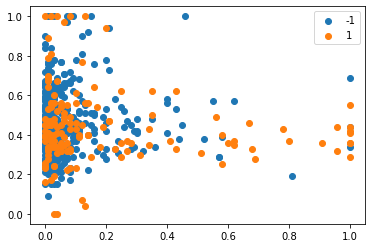

Default logistic regression accuracy  = 0.819715, AUC = 0.858689
Balanced logistic regression accuracy = 0.776387, AUC = 0.859579


In [29]:
from imblearn.under_sampling import OneSidedSelection

X, y = us_crime.data, us_crime.target
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

# Oil Dataset

In [42]:
oil = fetch_datasets()["oil"]
X, y = oil.data, oil.target

Counter({-1: 896, 1: 41})


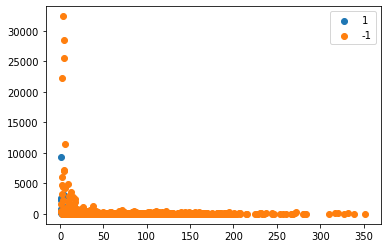

In [43]:
counter = Counter(y)
print(counter)

plot_points(counter)

In [44]:
def logistic_regression(X,y):
    # Train a logistic regression model using the balanced class weights 

    default_log_reg = LogisticRegression(class_weight=None, max_iter=40000)
    balanced_log_reg = LogisticRegression(class_weight='balanced', max_iter=40000)

    # Important to use a stratified K folds to make sure representative proportion of minority examples are used in each fold
    cv = StratifiedKFold(n_splits=5, shuffle=True)

    scores = cross_val_score(estimator=default_log_reg, X=X, y=y, cv=cv, scoring='accuracy')
    def_log_reg_acc = np.mean(scores)

    scores = cross_val_score(estimator=balanced_log_reg, X=X, y=y, cv=cv, scoring='accuracy')
    bal_log_reg_acc = np.mean(scores)

    scores = cross_val_score(estimator=default_log_reg, X=X, y=y, cv=cv, scoring='roc_auc')
    def_log_reg_roc = np.mean(scores)

    scores = cross_val_score(estimator=balanced_log_reg, X=X, y=y, cv=cv, scoring='roc_auc')
    bal_log_reg_roc = np.mean(scores)

    print("Default logistic regression accuracy  =", '{:.6f}, AUC = {:.6f}'.format(def_log_reg_acc, def_log_reg_roc))
    print("Balanced logistic regression accuracy =", '{:.6f}, AUC = {:.6f}'.format(bal_log_reg_acc, bal_log_reg_roc))

In [45]:
logistic_regression(X, y)

Default logistic regression accuracy  = 0.959438, AUC = 0.877547
Balanced logistic regression accuracy = 0.893259, AUC = 0.941495


Counter({-1: 41, 1: 41})


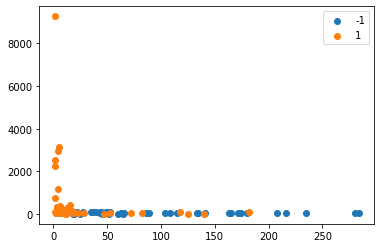

Default logistic regression accuracy  = 0.769118, AUC = 0.873264
Balanced logistic regression accuracy = 0.780882, AUC = 0.912847


In [46]:
# NearMiss-1
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=1, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 41, 1: 41})


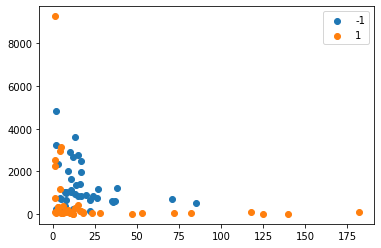

Default logistic regression accuracy  = 0.843382, AUC = 0.884028
Balanced logistic regression accuracy = 0.830882, AUC = 0.871875


In [47]:
# NearMiss-2
from imblearn.under_sampling import NearMiss

X, y = oil.data, oil.target
undersample = NearMiss(version=2, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 41, 1: 41})


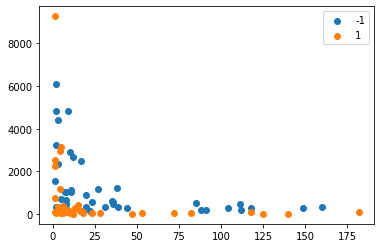

Default logistic regression accuracy  = 0.879412, AUC = 0.947569
Balanced logistic regression accuracy = 0.890441, AUC = 0.837847


In [48]:
# NearMiss-3
from imblearn.under_sampling import NearMiss

X, y = oil.data, oil.target
undersample = NearMiss(version=3, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 99, 1: 41})


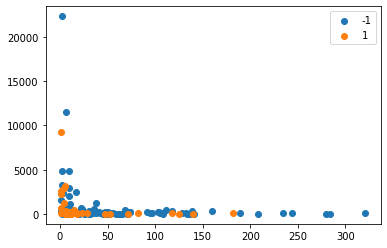

Default logistic regression accuracy  = 0.842857, AUC = 0.908626
Balanced logistic regression accuracy = 0.771429, AUC = 0.912251


In [49]:
from imblearn.under_sampling import CondensedNearestNeighbour

X, y = oil.data, oil.target
undersample = CondensedNearestNeighbour(n_neighbors=1)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 873, 1: 41})


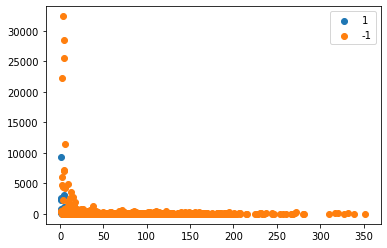

Default logistic regression accuracy  = 0.963904, AUC = 0.923714
Balanced logistic regression accuracy = 0.890584, AUC = 0.917539


In [50]:
from imblearn.under_sampling import TomekLinks

X, y = oil.data, oil.target
undersample = TomekLinks()
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)

Counter({-1: 262, 1: 41})


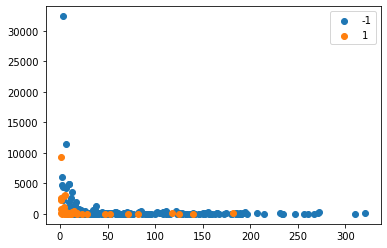

Default logistic regression accuracy  = 0.917377, AUC = 0.892499
Balanced logistic regression accuracy = 0.831694, AUC = 0.923381


In [51]:
from imblearn.under_sampling import OneSidedSelection

X, y = oil.data, oil.target
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
logistic_regression(X,y)